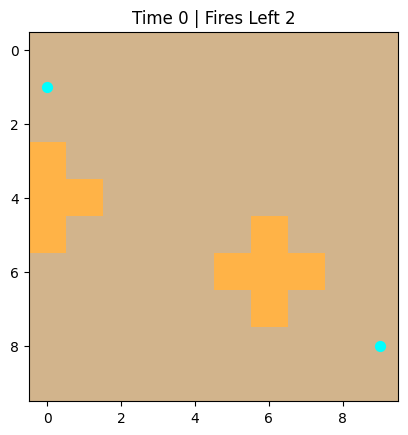

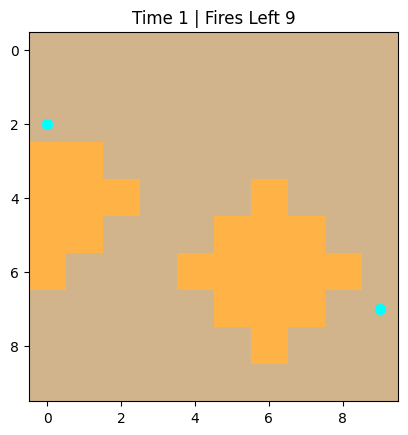

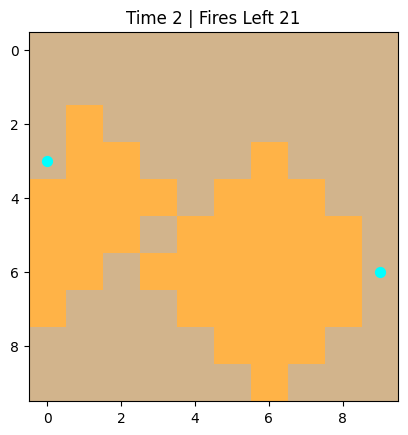

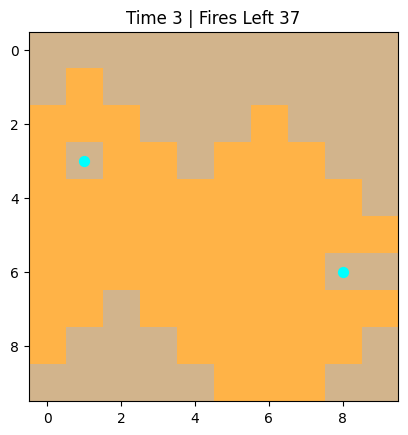

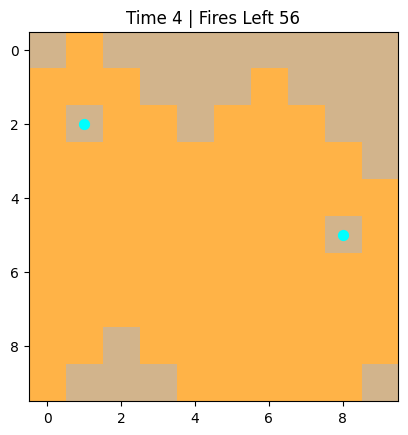

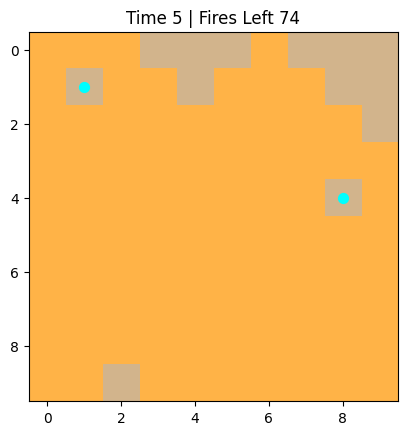

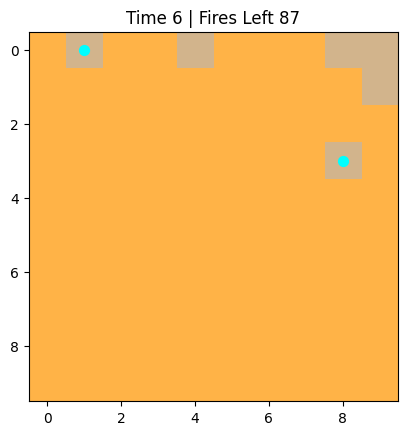

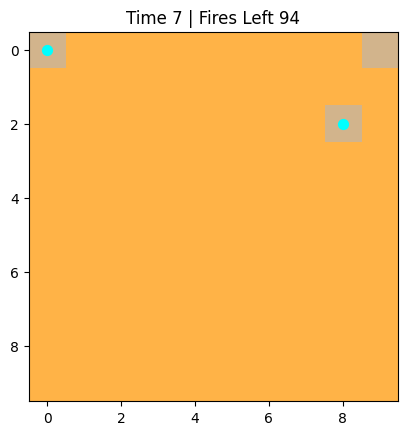

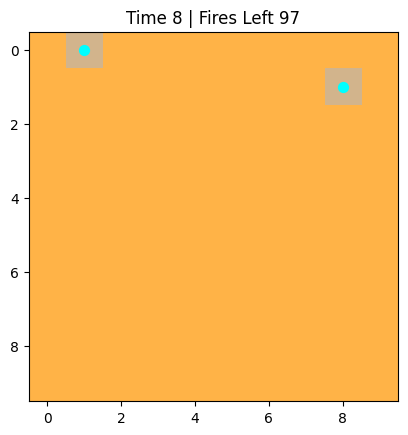

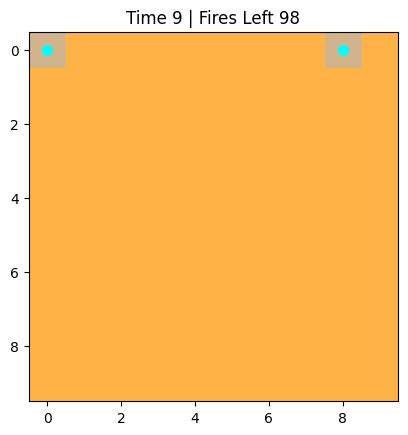

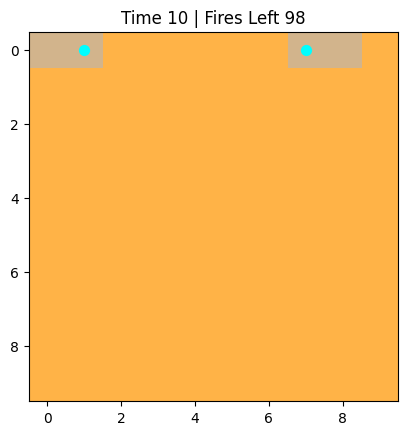

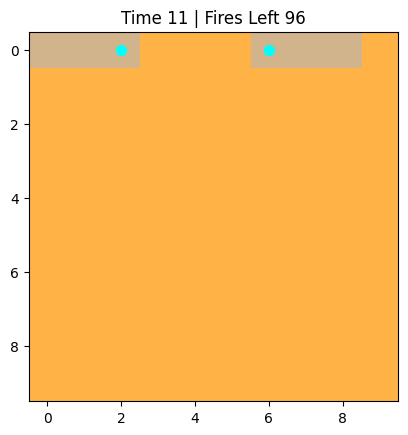

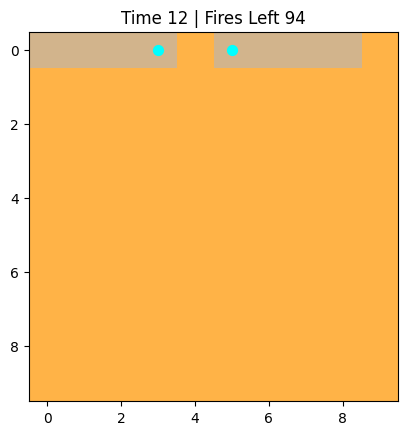

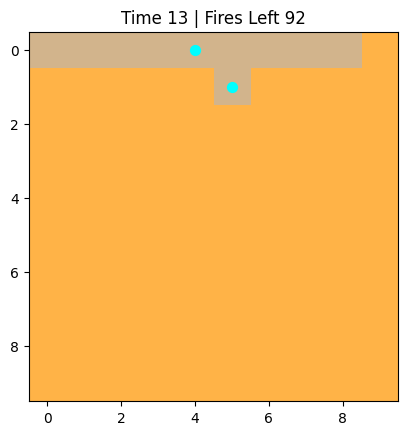

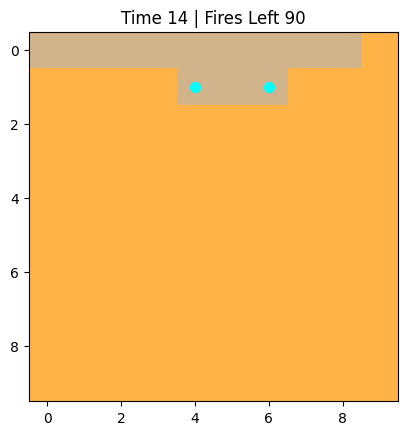

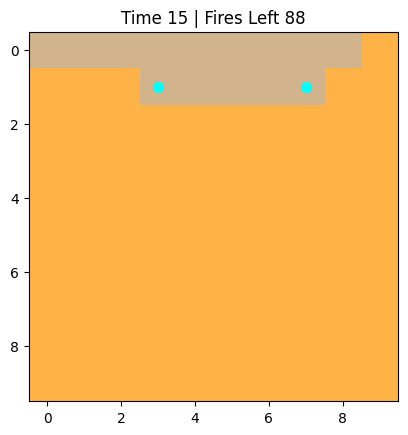

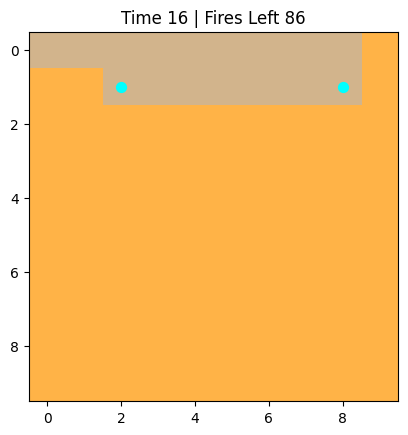

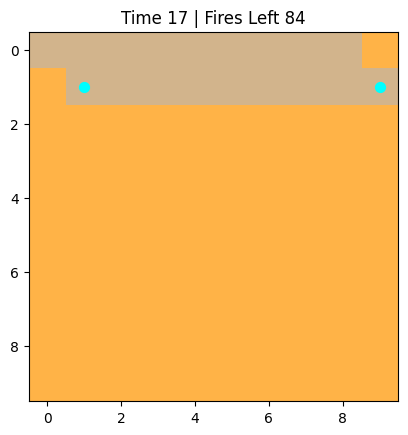

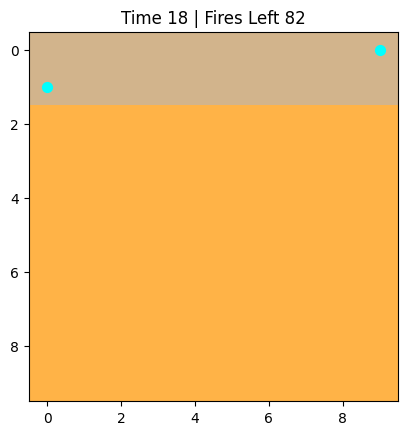

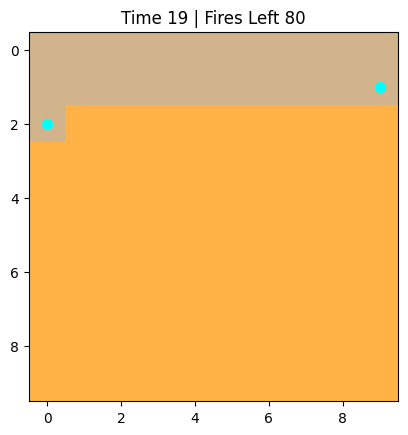

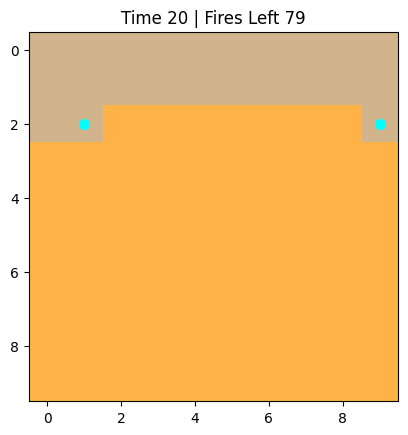

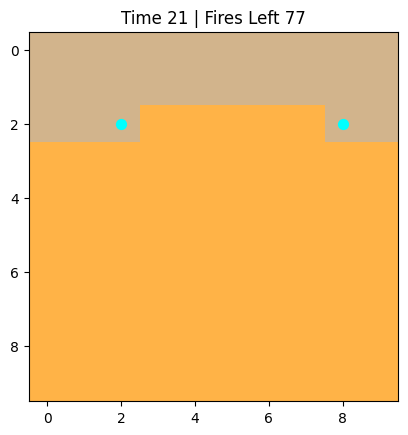

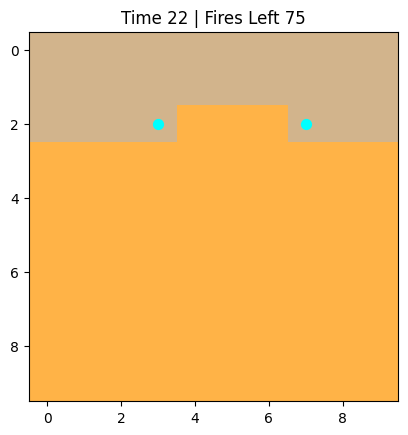

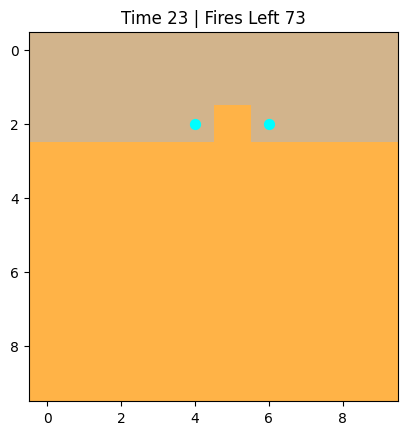

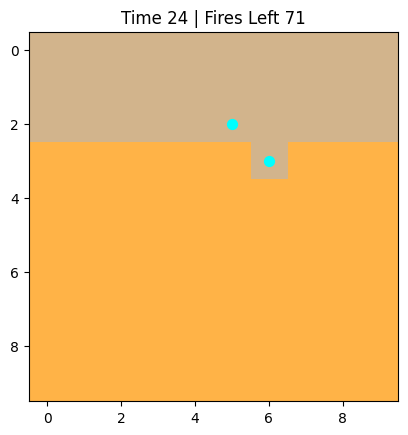

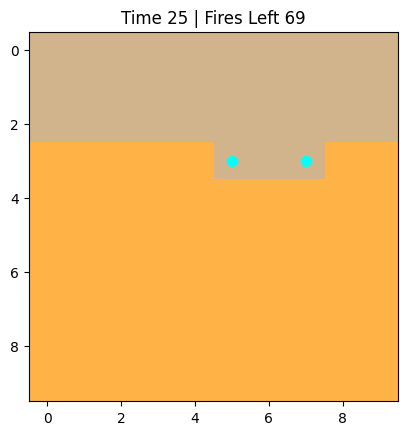

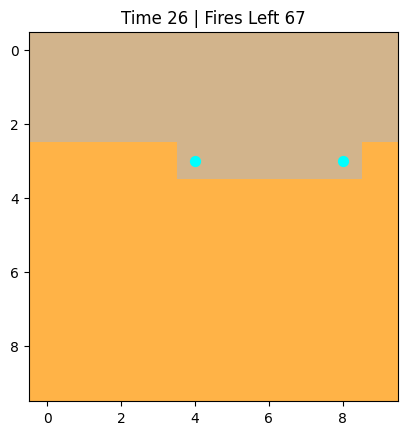

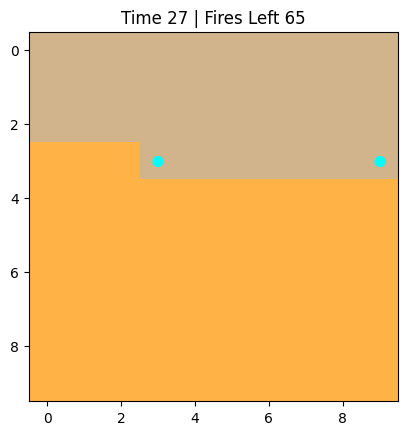

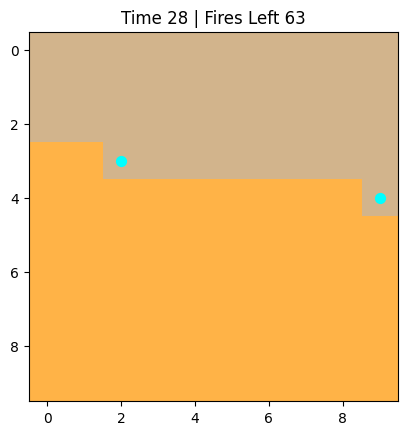

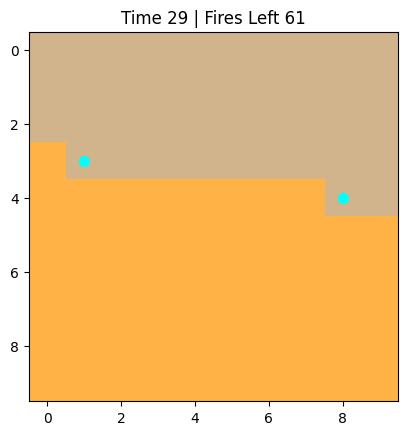

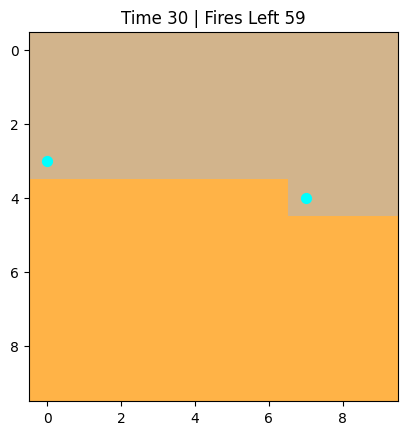

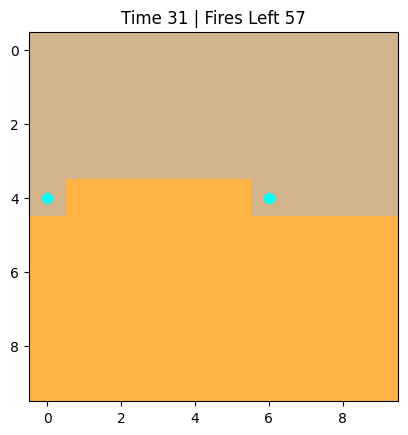

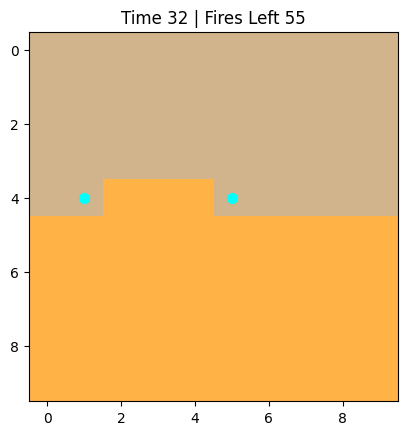

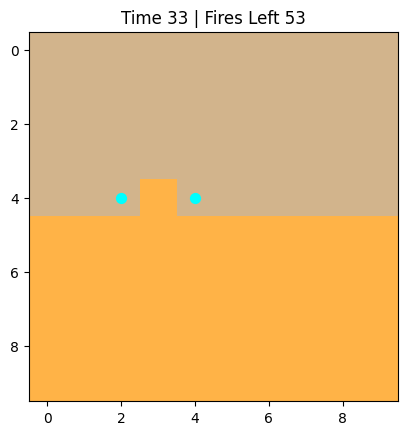

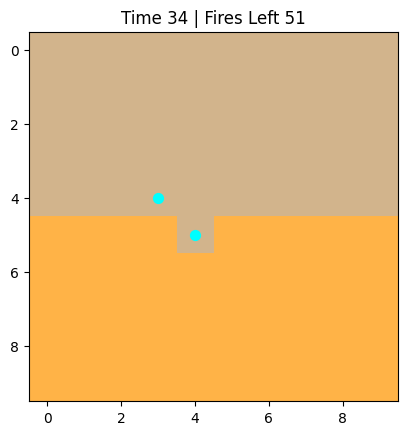

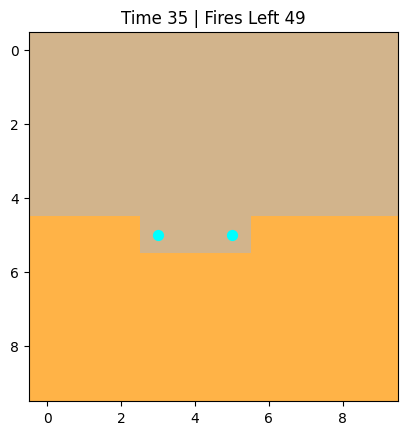

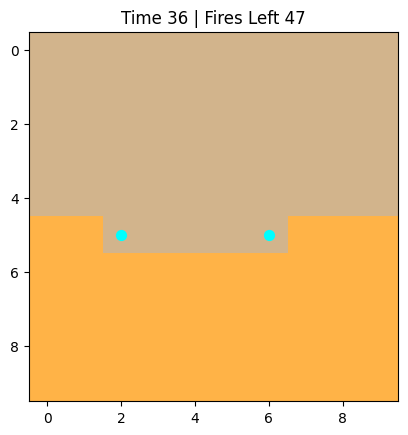

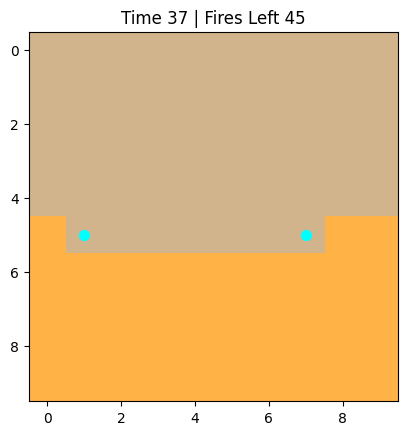

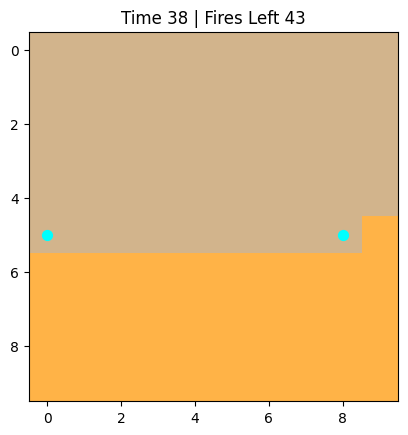

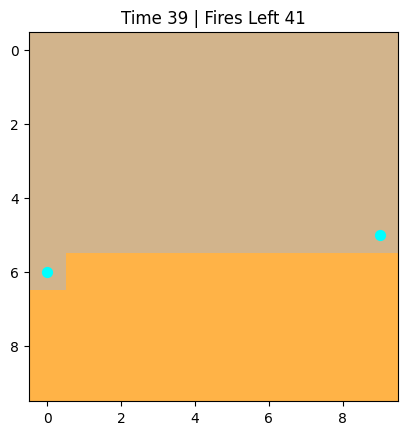

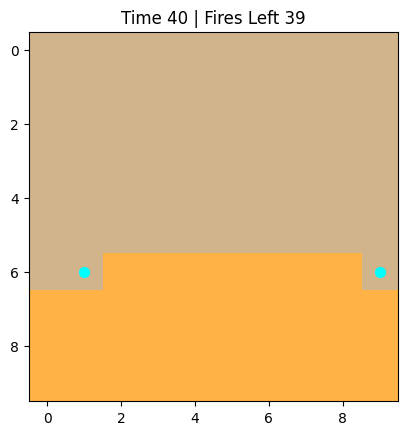

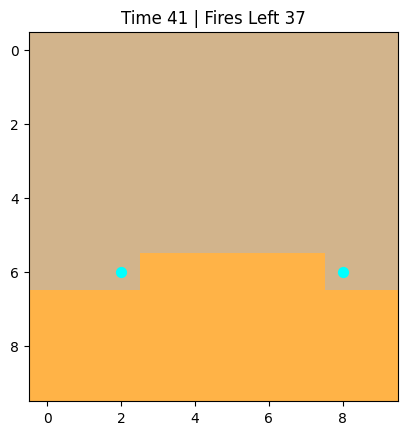

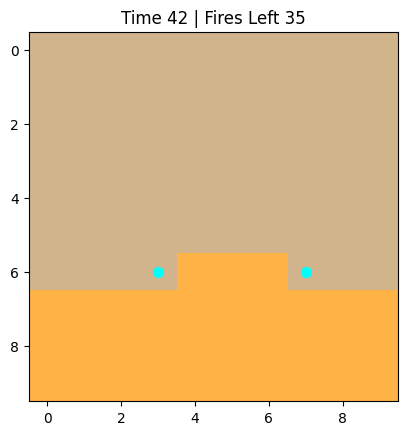

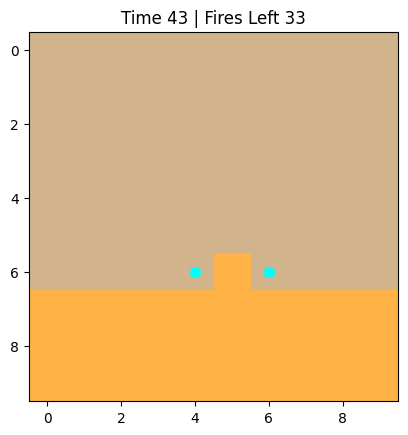

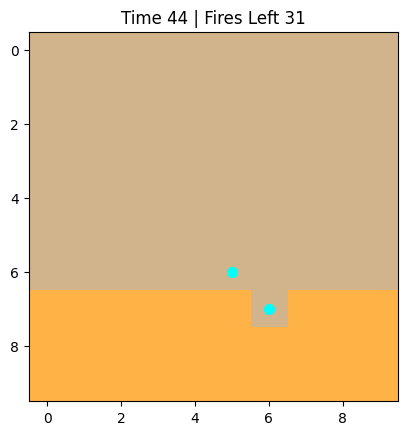

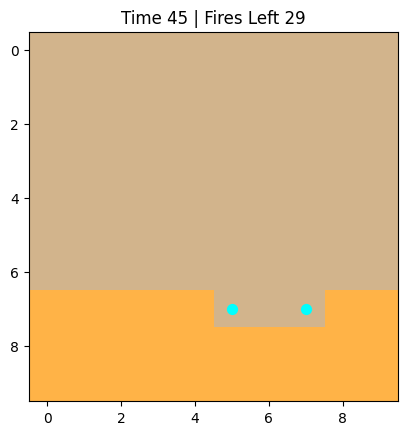

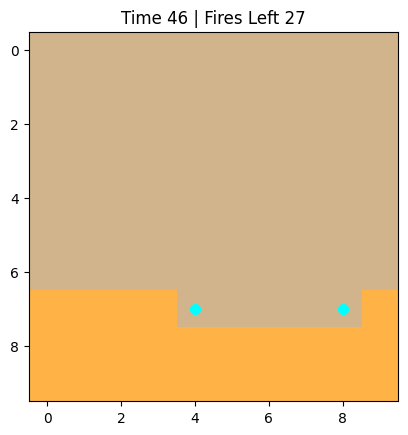

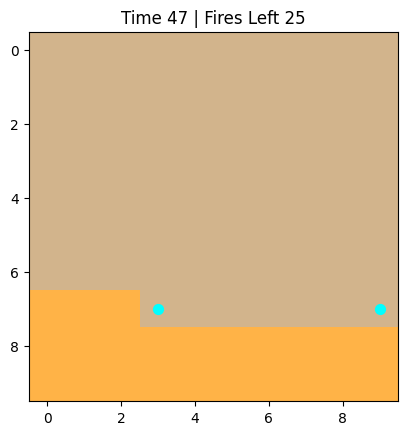

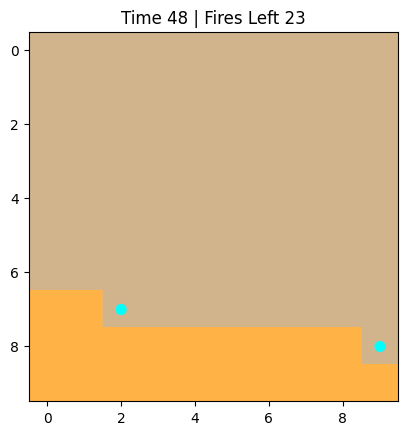

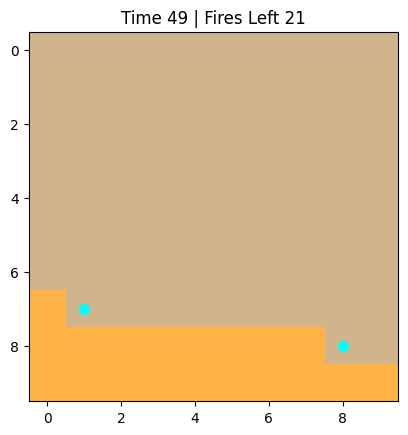

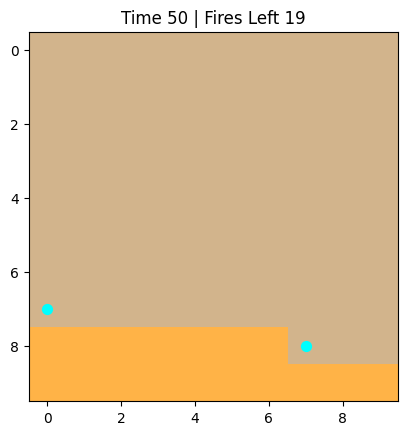

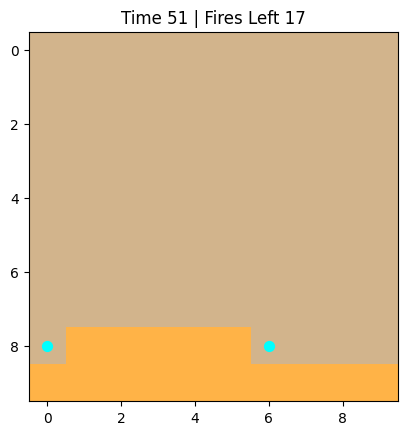

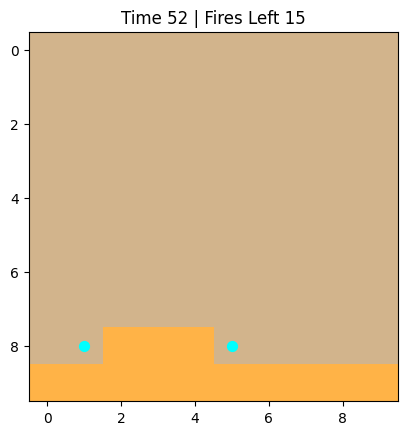

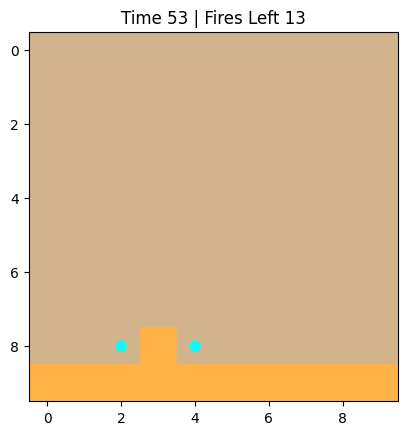

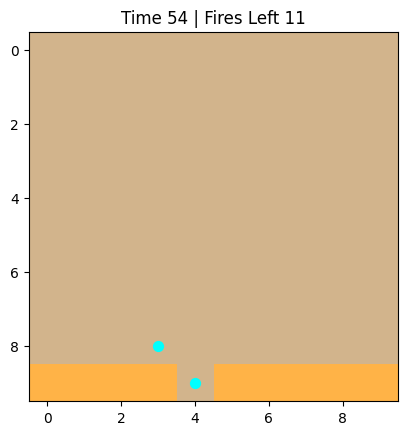

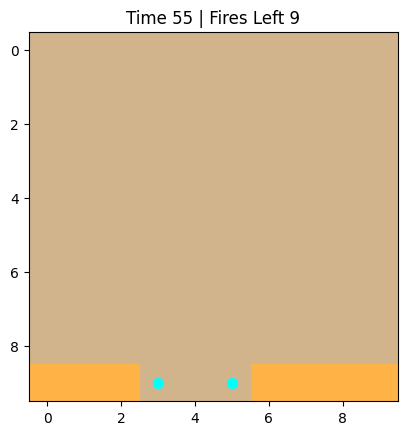

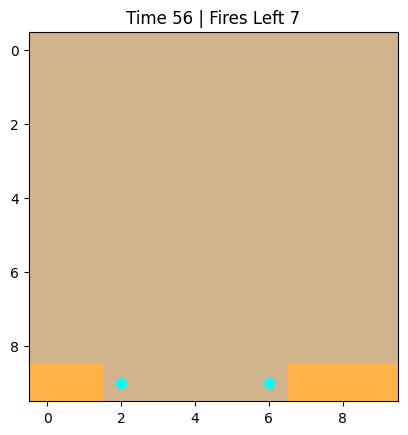

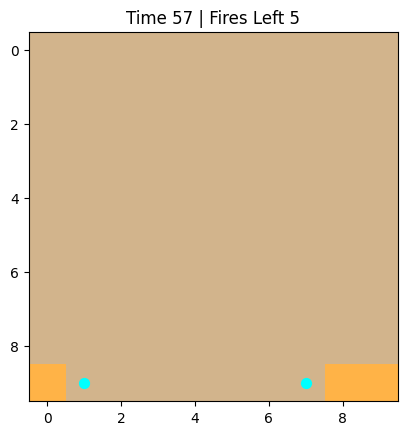

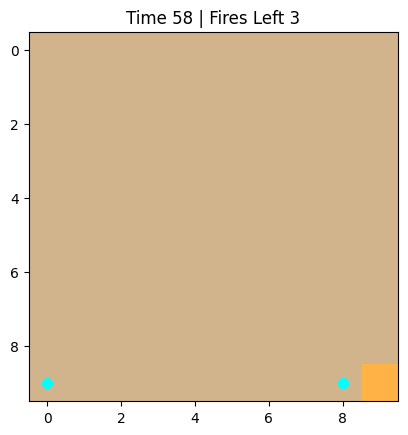

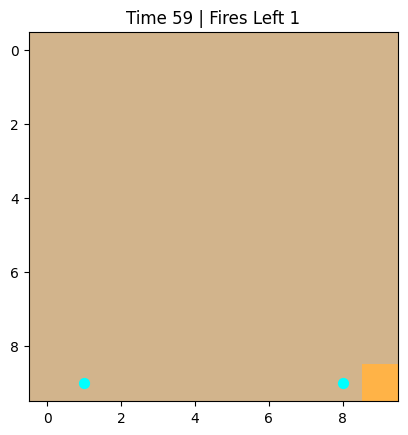

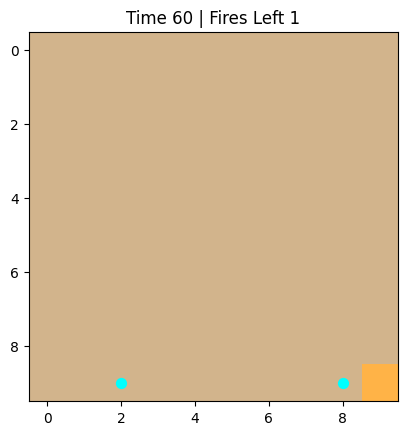

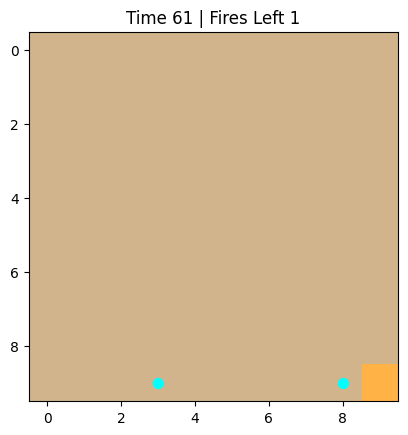

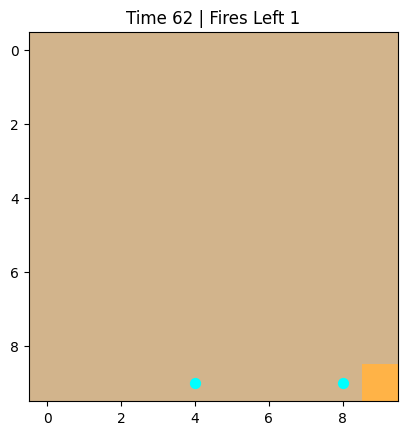

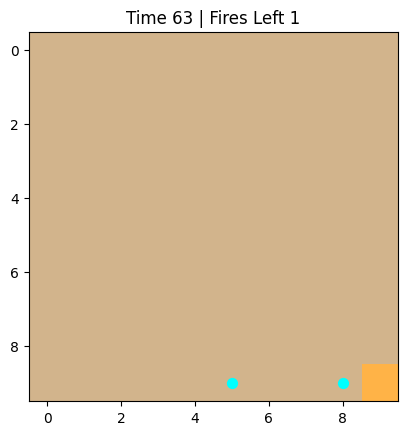

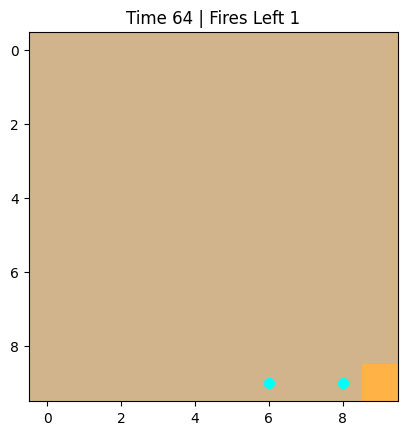

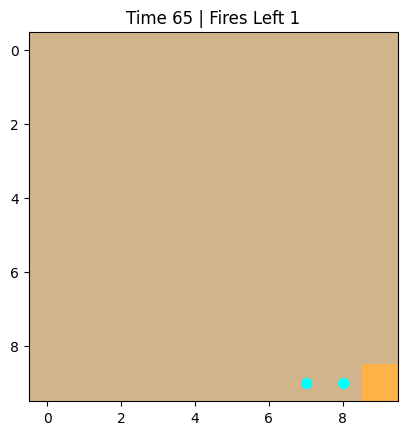

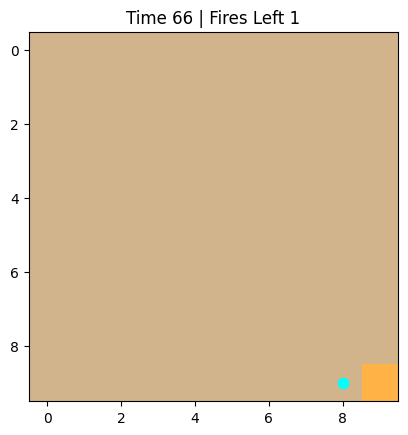

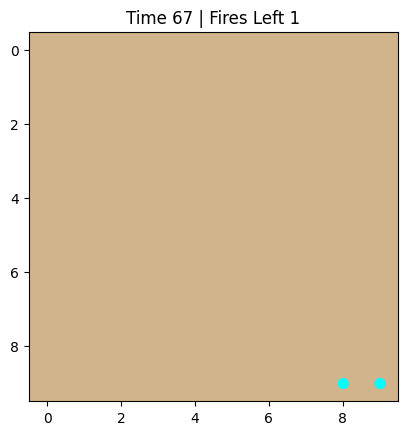

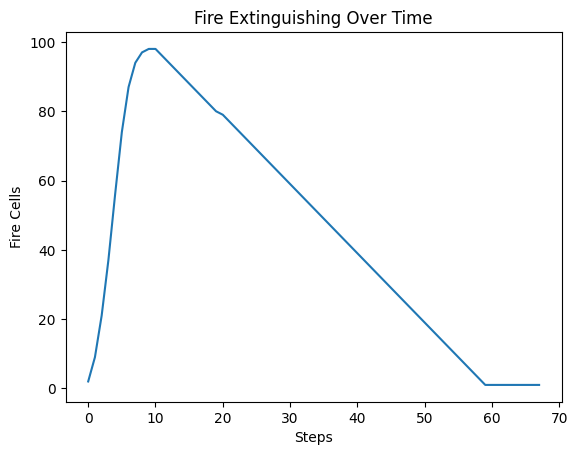

Total time: 68


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.ion()

# --------------------------------------------------------
# COLOR MAP (light brown background + light orange fire)
# --------------------------------------------------------
from matplotlib.colors import ListedColormap
cmap = ListedColormap([
    "#d2b48c",   # empty
    "#ffa500",   # unused
    "#ffb347"    # fire
])

# --------------------------------------------------------
# Fire Spread
# --------------------------------------------------------
def spread_fire(grid):
    R, C = grid.shape
    new_fire = []
    fire = [(r, c) for r in range(R) for c in range(C) if grid[r, c] == 2]

    for r, c in fire:
        for dr, dc in [(1,0), (-1,0), (0,1), (0,-1)]:
            nr, nc = r + dr, c + dc
            if 0 <= nr < R and 0 <= nc < C and grid[nr, nc] == 0:
                new_fire.append((nr, nc))

    for (r, c) in new_fire:
        grid[r, c] = 2


# --------------------------------------------------------
# Closest fire assignment
# --------------------------------------------------------
def assign_targets(agents, fire_cells):
    fire_cells = fire_cells.copy()
    targets = []

    for (ax, ay) in agents:
        if not fire_cells:
            targets.append(None)
            continue
        d = [abs(ax - x) + abs(ay - y) for (x, y) in fire_cells]
        idx = int(np.argmin(d))
        targets.append(fire_cells.pop(idx))

    return targets


# --------------------------------------------------------
# Move agent
# --------------------------------------------------------
def move_step(agent, target):
    if target is None:
        return agent

    ax, ay = agent
    tx, ty = target

    if ax < tx: ax += 1
    elif ax > tx: ax -= 1
    elif ay < ty: ay += 1
    elif ay > ty: ay -= 1

    return (ax, ay)


# --------------------------------------------------------
# SIMULATION
# --------------------------------------------------------
N = 10
grid = np.zeros((N, N), dtype=int)

grid[6, 6] = 2
grid[4, 0] = 2

agents = [(0,0), (9,9)]

time = 0
history = []

while True:

    fire_cells = [(r, c) for r in range(N) for c in range(N) if grid[r, c] == 2]

    if not fire_cells:
        break

    history.append(len(fire_cells))

    # Assign & move agents FIRST
    targets = assign_targets(agents, fire_cells)

    new_agents = []
    for a, t in zip(agents, targets):
        new_pos = move_step(a, t)
        if t and new_pos == t:
            grid[new_pos] = 0
        new_agents.append(new_pos)
    agents = new_agents

    # --------------------------------------------------------
    # 🔥 SPREAD FIRE — firefighters will extinguish simultaneously
    # --------------------------------------------------------
    if time < 10:
        spread_fire(grid)

        # 🔥 NEW: Immediately extinguish fires they step onto AFTER spread
        for (x, y) in agents:
            if grid[x, y] == 2:
                grid[x, y] = 0

    # visualization
    plt.imshow(grid, cmap=cmap)
    ax = plt.gca()
    for (x, y) in agents:
        ax.scatter(y, x, s=50, c="cyan")

    plt.title(f"Time {time} | Fires Left {len(fire_cells)}")
    plt.pause(0.1)
    plt.clf()

    time += 1
    if time > 300:
        break

plt.ioff()
plt.close()

plt.plot(history)
plt.xlabel("Steps")
plt.ylabel("Fire Cells")
plt.title("Fire Extinguishing Over Time")
plt.show()

print("Total time:", time)